In [1]:
import scipy
from scipy.stats import skew,norm,zscore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')

In [3]:
df.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [4]:
df['zscore'] = zscore(df['total_bill'])
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [5]:
skew(df['total_bill'])

1.1262346334818638

In [6]:
#pivot table/contingency table:
#    BLR    MAA   PUN
# M   
# F

In [7]:
ser1 = pd.Series(np.array([1,2,np.nan]),index=list('ABC'))
ser1

A    1.0
B    2.0
C    NaN
dtype: float64

In [8]:
import numpy as np
import pandas as pd
df1 = pd.DataFrame({'A':np.array([1,4,np.nan,np.nan]),'B':np.array([2,5,7,np.nan]),'C':np.array([3,np.nan,np.nan,np.nan])})
df1

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN
3,NaN,NaN,NaN


In [9]:
#first check skewness of data, and then fillNA depending on that

In [10]:
#Precautionary method is to replace with median(depending on the case)

In [11]:
df1.mean()

A    2.500000
B    4.666667
C    3.000000
dtype: float64

In [12]:
df1.median()

A    2.5
B    5.0
C    3.0
dtype: float64

In [13]:
df1.isnull().sum()

A    2
B    1
C    3
dtype: int64

In [14]:
df1.dropna(how='all')

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN


In [15]:
df1.dropna(axis=1)

""
0
1
2
3


In [16]:
df1.dropna(axis=1,how='all')

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN
3,NaN,NaN,NaN


In [17]:
df1.dropna(thresh=1)  #need at least one non null value in row

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN


In [18]:
df1.dropna(thresh=2)   #need at least two non null value in row

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN


In [19]:
df1.dropna(thresh=3)   #need at least three non null value in row

,A,B,C
0,1.0,2.0,3.0


In [20]:
df1.dropna(inplace=True)
df1

,A,B,C
0,1.0,2.0,3.0


In [21]:
import numpy as np
import pandas as pd
df1 = pd.DataFrame({'A':np.array([1,4,np.nan,np.nan]),'B':np.array([2,5,7,np.nan]),'C':np.array([3,np.nan,np.nan,np.nan])})
df1

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN
3,NaN,NaN,NaN


In [22]:
df1.fillna(0)

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,0.0
2,0.0,7.0,0.0
3,0.0,0.0,0.0


In [23]:
df1.fillna(value={'A':0},inplace=True)
df1

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,0.0,7.0,NaN
3,0.0,NaN,NaN


In [24]:
df1['B'].fillna(0,inplace=True)
df1

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,0.0,7.0,NaN
3,0.0,0.0,NaN


In [25]:
df1.fillna(method='ffill')  #foward and backward is present, but 'nearest' is not

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,3.0
2,0.0,7.0,3.0
3,0.0,0.0,3.0


In [26]:
import numpy as np
import pandas as pd
df1 = pd.DataFrame({'A':np.array([1,4,np.nan,np.nan]),'B':np.array([2,5,7,np.nan]),'C':np.array([3,np.nan,np.nan,np.nan])})
df1

,A,B,C
0,1.0,2.0,3.0
1,4.0,5.0,NaN
2,NaN,7.0,NaN
3,NaN,NaN,NaN


In [27]:
df1['B'].fillna(df1['B'].mean(),inplace=True)
df1

,A,B,C
0,1.0,2.000000,3.0
1,4.0,5.000000,NaN
2,NaN,7.000000,NaN
3,NaN,4.666667,NaN


In [28]:
#Bivariate and Multivariate analysis:
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


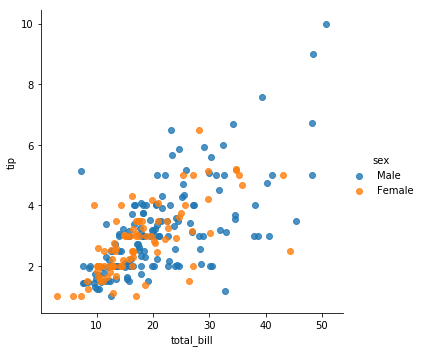

In [29]:
sns.lmplot(data=df,x='total_bill',y='tip',hue='sex',fit_reg=False)
plt.show()

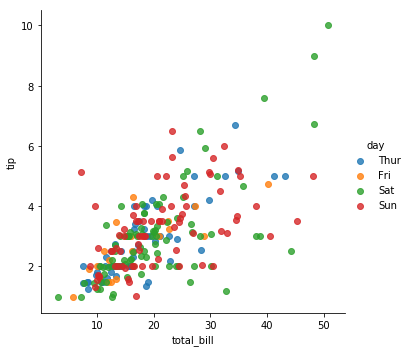

In [30]:
sns.lmplot(data=df,x='total_bill',y='tip',hue='day',fit_reg=False)
plt.show()

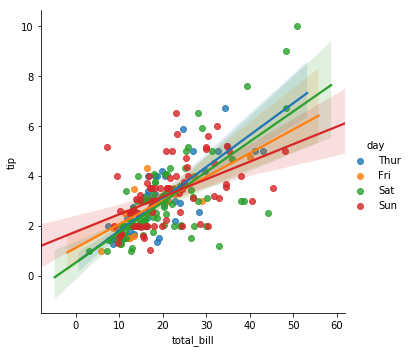

In [31]:
sns.lmplot(data=df,x='total_bill',y='tip',hue='day',fit_reg=True)
plt.show()

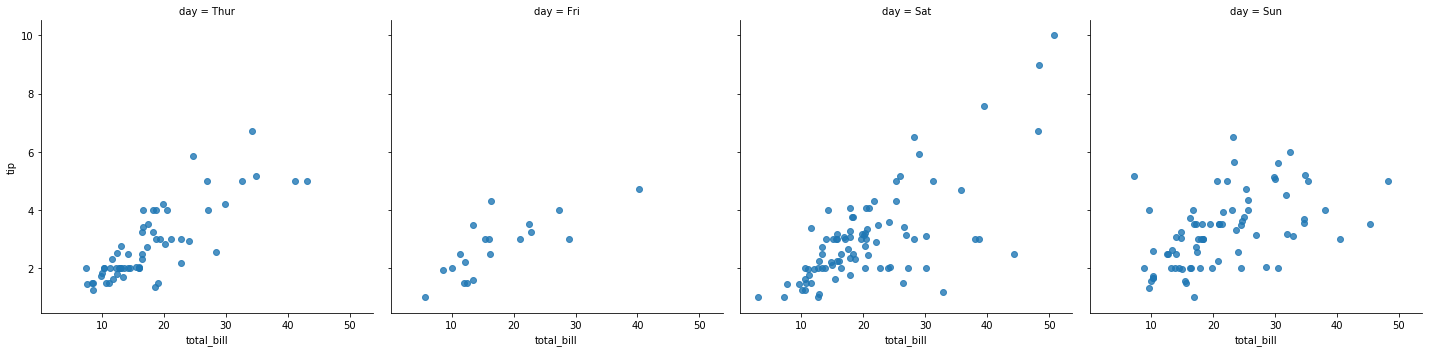

In [32]:
sns.lmplot(data=df,x='total_bill',y='tip',col ='day',fit_reg=False)
plt.show()

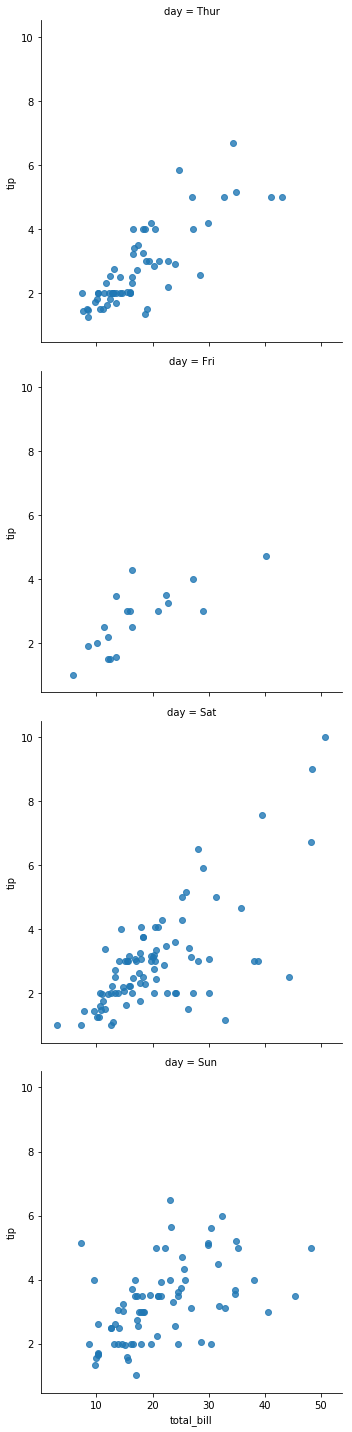

In [33]:
sns.lmplot(data=df,x='total_bill',y='tip',row ='day',fit_reg=False)
plt.show()

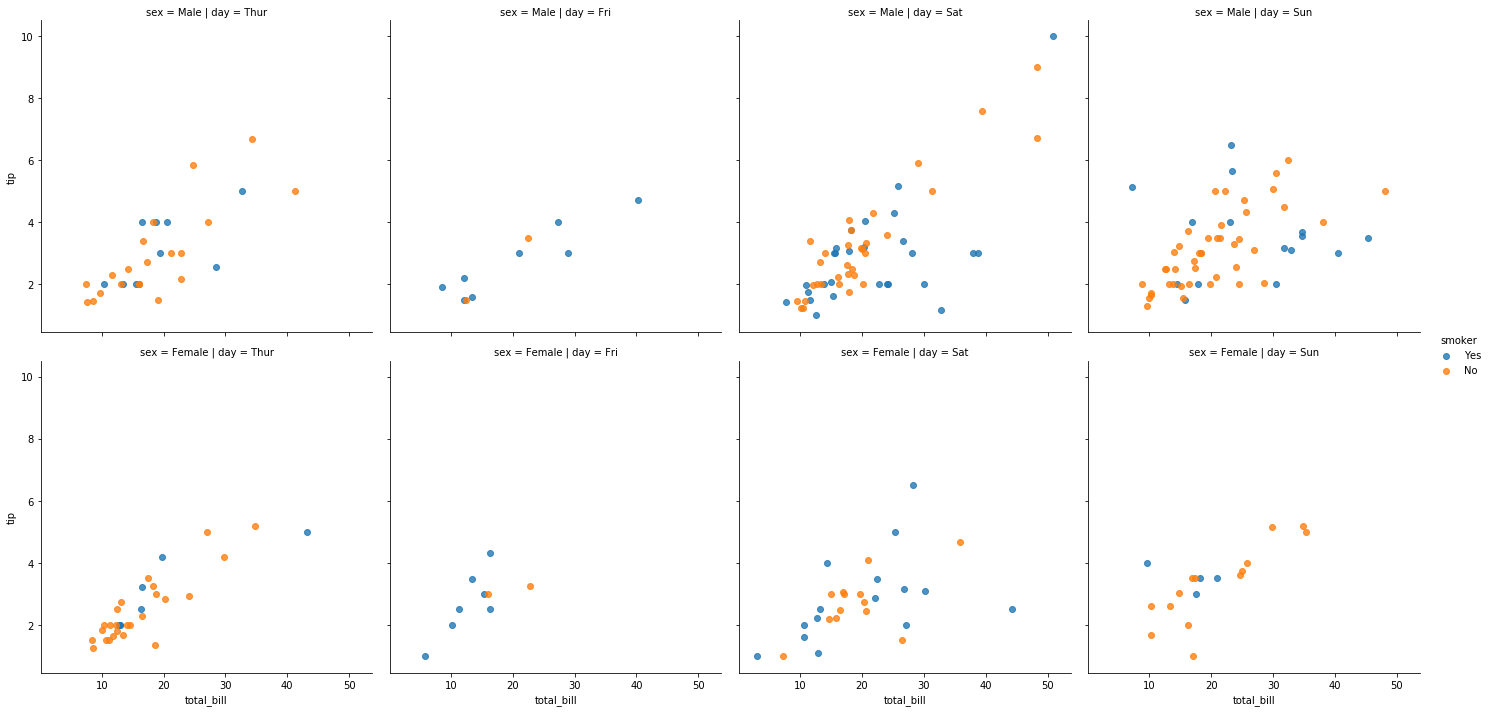

In [34]:
sns.lmplot(data=df,x='total_bill',y='tip',col ='day',row='sex',hue='smoker',fit_reg=False)
plt.show()

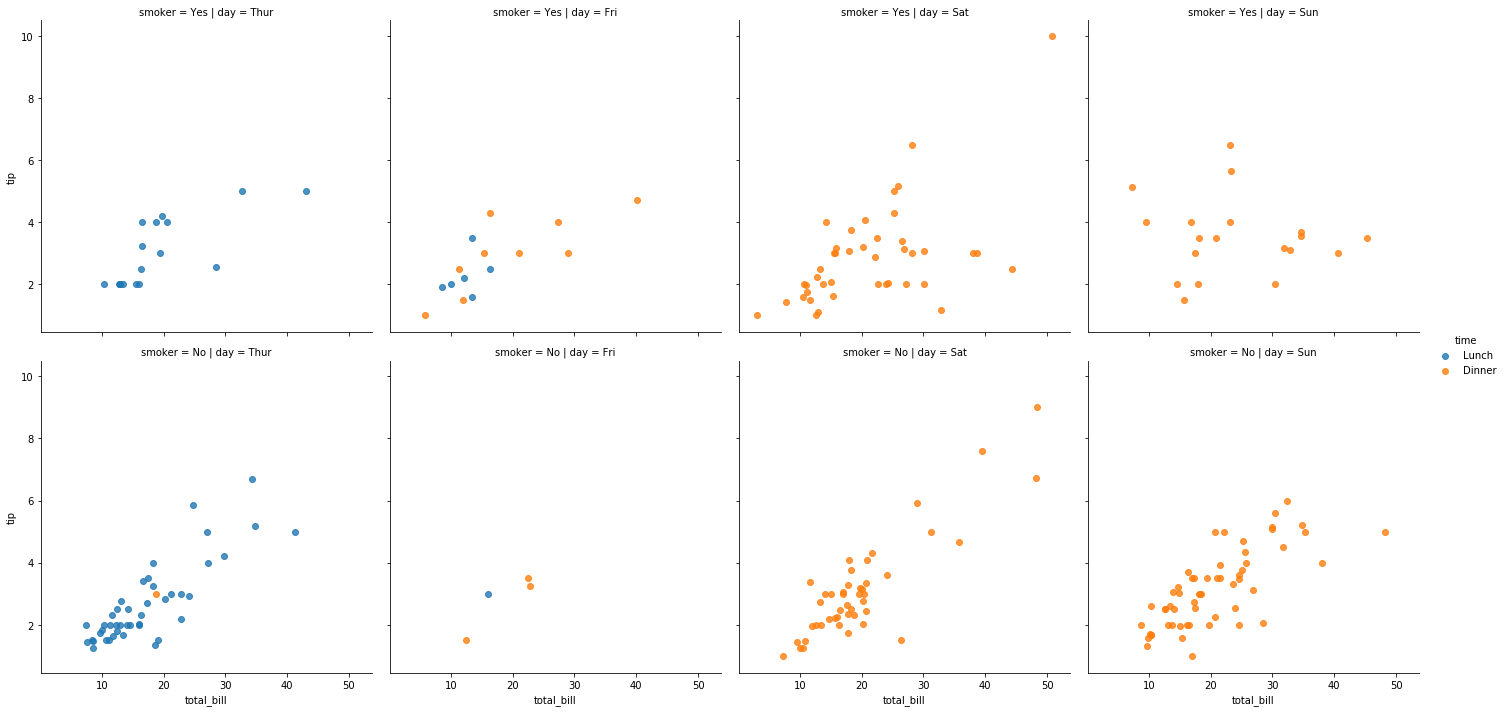

In [35]:
sns.lmplot(data=df,x='total_bill',y='tip',col ='day',row='smoker',hue='time',fit_reg=False)
plt.show()

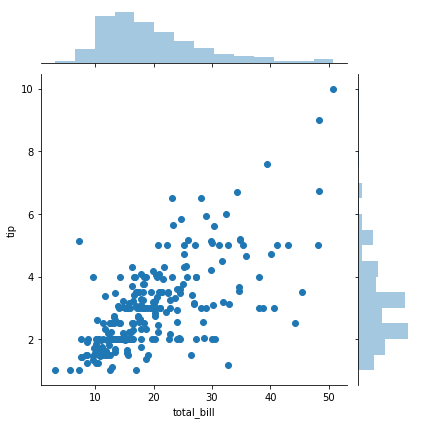

In [36]:
sns.jointplot(data=df,x='total_bill',y='tip')

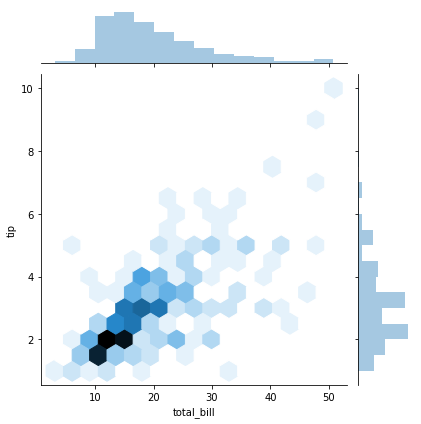

In [37]:
sns.jointplot(data=df,x='total_bill',y='tip',kind='hex') #darkest color is highly densed
plt.show()

In [38]:
#jointplot is for two numerical quantities(bivariate)

In [39]:
#for frequency(univariate) it is bar plot/histogram

In [40]:
#distribution of y with respect to each category/specific band(salary earned or tip paid) in x: stripplot (x is categorical)

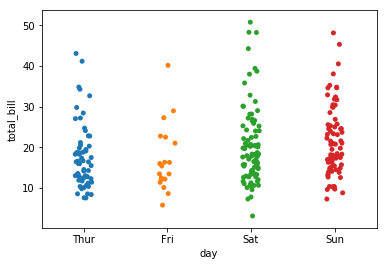

In [41]:
sns.stripplot(x='day',y='total_bill',data=df)
plt.show()

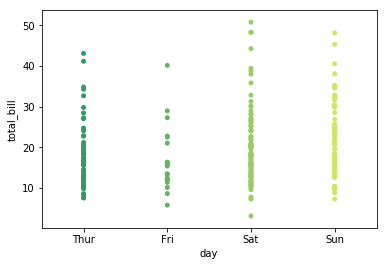

In [42]:
sns.stripplot(x='day',y='total_bill',data=df,jitter=False,palette='summer')
plt.show()

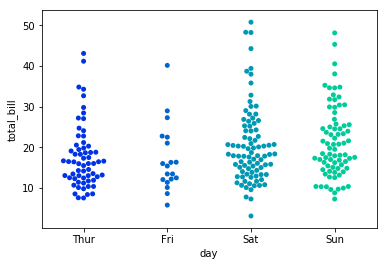

In [43]:
sns.swarmplot(x='day',y='total_bill',data=df,palette='winter')

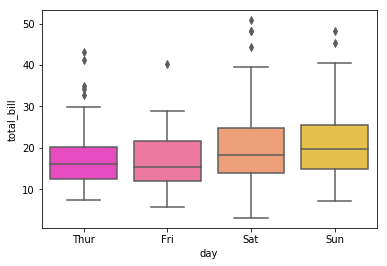

In [44]:
sns.boxplot(x='day',y='total_bill',data=df,palette='spring')

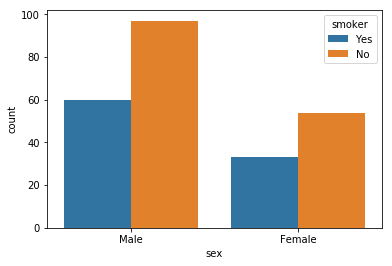

In [45]:
sns.countplot(x='sex',data=df,hue='smoker')
plt.show()

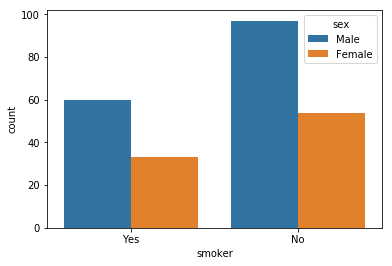

In [46]:
sns.countplot(x='smoker',data=df,hue='sex')
plt.show()

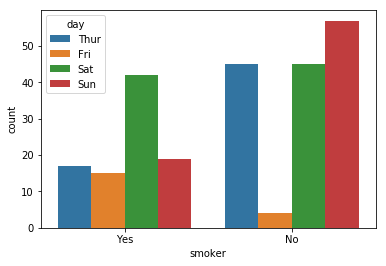

In [47]:
sns.countplot(x='smoker',data=df,hue='day')
plt.show()

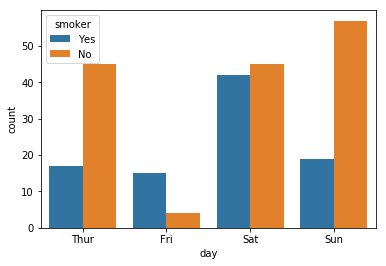

In [48]:
sns.countplot(x='day',data=df,hue='smoker')
plt.show()

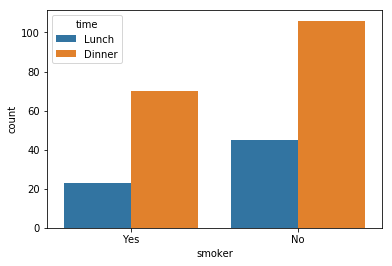

In [49]:
sns.countplot(x='smoker',data=df,hue='time')
plt.show()

In [50]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,zscore
0,16.99,1.01,Female,No,Sun,Dinner,2,-0.314711
1,10.34,1.66,Male,No,Sun,Dinner,3,-1.063235
2,21.01,3.50,Male,No,Sun,Dinner,3,0.137780
3,23.68,3.31,Male,No,Sun,Dinner,2,0.438315
4,24.59,3.61,Female,No,Sun,Dinner,4,0.540745


In [51]:
df.groupby(['smoker','sex']).agg({'size':'count'})

size
smoker sex         
Yes    Male      60
       Female    33
No     Male      97
       Female    54

In [52]:
df.groupby(['smoker','sex']).count()

total_bill  tip  day  time  size  zscore
smoker sex                                             
Yes    Male            60   60   60    60    60      60
       Female          33   33   33    33    33      33
No     Male            97   97   97    97    97      97
       Female          54   54   54    54    54      54

In [53]:
df.groupby(['sex','day']).agg({'tip':'max'})

tip
sex    day        
Male   Thur   6.70
       Fri    4.73
       Sat   10.00
       Sun    6.50
Female Thur   5.17
       Fri    4.30
       Sat    6.50
       Sun    5.20

In [54]:
#with pivot table:
df.pivot_table(index='sex',columns='smoker',values='size',aggfunc='count')

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [55]:
pd.crosstab(df['sex'],df['day'])

day,Thur,Fri,Sat,Sun
sex,,,,
Male,30,10,59,58
Female,32,9,28,18


In [56]:
df.corr()

,total_bill,tip,size,zscore
total_bill,1.000000,0.675734,0.598315,1.000000
tip,0.675734,1.000000,0.489299,0.675734
size,0.598315,0.489299,1.000000,0.598315
zscore,1.000000,0.675734,0.598315,1.000000


In [57]:
corr = df[['total_bill','tip']].corr()
corr

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


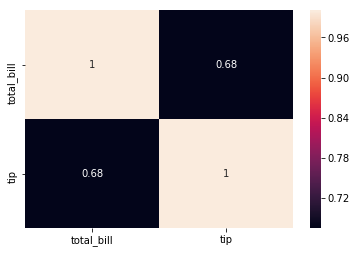

In [58]:
sns.heatmap(corr,annot=True)
plt.show()

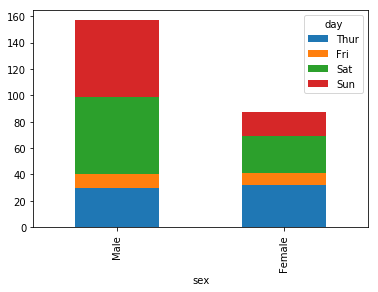

In [59]:
pd.crosstab(df['sex'],df['day']).plot.bar(stacked=True)

In [60]:
mast = pd.read_csv('master-1.csv')
mast.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [61]:
mast.groupby(['country','year','sex']).agg({'suicides_no':'sum'}).head()

suicides_no
country year sex                
Albania 1987 female           25
             male             48
        1988 female           22
             male             41
        1989 female           15

In [62]:
mast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [63]:
mast.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [64]:
mast.dtypes.value_counts()

object     6
int64      4
float64    2
dtype: int64

In [65]:
mast.dtypes.value_counts().sum()

12

In [66]:
mast.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [93]:
df2 = mast.isnull().sum()
df3 = (mast.isnull().sum()/(mast.count()+mast.isnull().sum()))*100
mast1 = mast.append(df2,ignore_index=True)
mast2 = mast1.append(df3,ignore_index=True)
mast2.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
27817,Uzbekistan,2014.0,male,5-14 years,60.0,2762158.0,2.17,Uzbekistan2014,0.675000,"63,067,077,179",2309.0,Generation Z
27818,Uzbekistan,2014.0,female,5-14 years,44.0,2631600.0,1.67,Uzbekistan2014,0.675000,"63,067,077,179",2309.0,Generation Z
27819,Uzbekistan,2014.0,female,55-74 years,21.0,1438935.0,1.46,Uzbekistan2014,0.675000,"63,067,077,179",2309.0,Boomers
27820,0,0.0,0,0,0.0,0.0,0.00,0,19456.000000,0,0.0,0
27821,0,0.0,0,0,0.0,0.0,0.00,0,69.935298,0,0.0,0


In [68]:
def fun(df):
    null = df.isnull().sum()
    percent = (null/df.shape[0])*100
    return(pd.concat([null,percent],axis=1,keys=['null_count','percent']))
fun(mast)

,null_count,percent
country,0,0.000000
year,0,0.000000
sex,0,0.000000
age,0,0.000000
suicides_no,0,0.000000
population,0,0.000000
suicides/100k pop,0,0.000000
country-year,0,0.000000
HDI for year,19456,69.935298
gdp_for_year ($),0,0.000000


In [69]:
mast.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


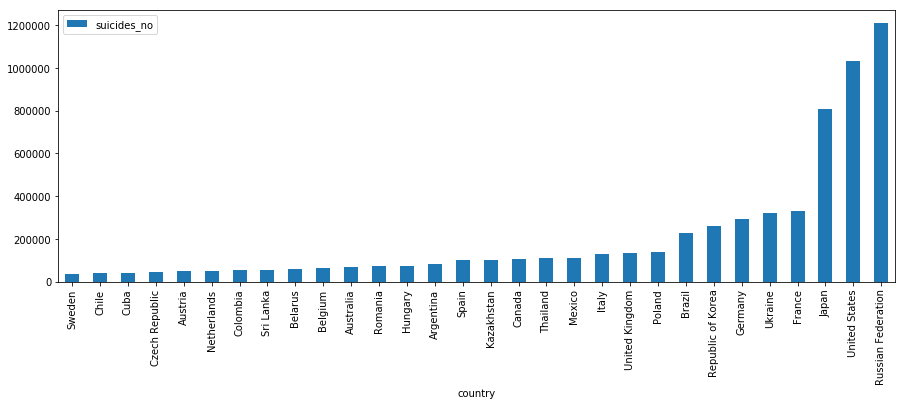

In [70]:
mast.groupby('country').agg({'suicides_no':'sum'}).sort_values(by='suicides_no').tail(30).plot.bar(figsize=(15,5))

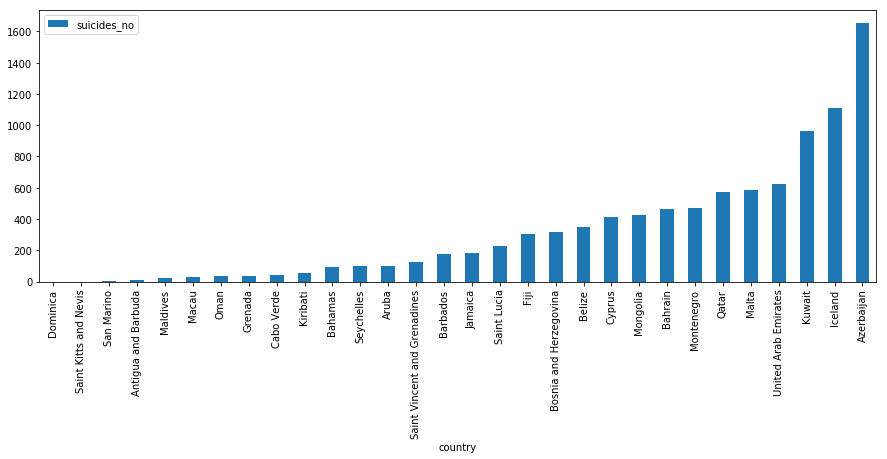

In [71]:
mast.groupby('country').agg({'suicides_no':'sum'}).sort_values(by='suicides_no').head(30).plot.bar(figsize=(15,5))

In [72]:
mast.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


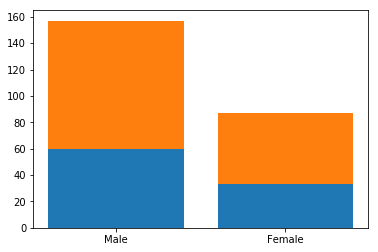

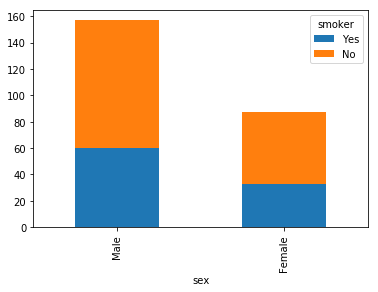

In [102]:
a =df[df['smoker']=='Yes']['sex'].value_counts()
b =df[df['smoker']=='No']['sex'].value_counts()
plt.bar(a.index,a.values)
plt.bar(b.index,b.values,bottom=a.values)
plt.show()
pd.crosstab(df['sex'],df['smoker']).plot.bar(stacked=True)

In [74]:
mast.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


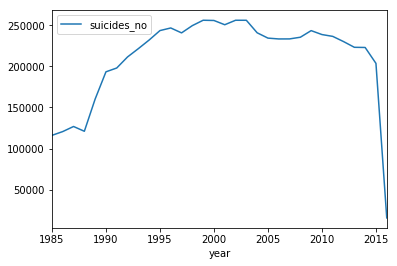

In [75]:
mast.groupby('year').agg({'suicides_no':'sum'}).plot()

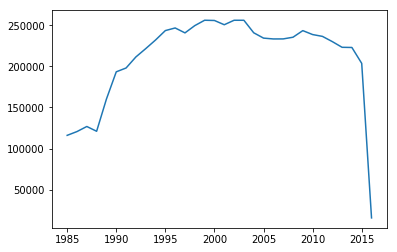

In [76]:
plt.plot(mast.groupby('year').agg({'suicides_no':'sum'}))

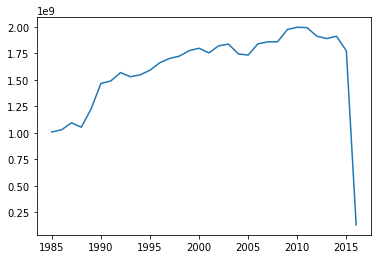

In [77]:
plt.plot(mast.groupby('year').agg({'population':'sum'}))

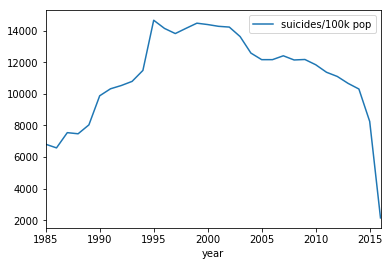

In [78]:
mast.groupby('year').agg({'suicides/100k pop':'sum'}).plot()

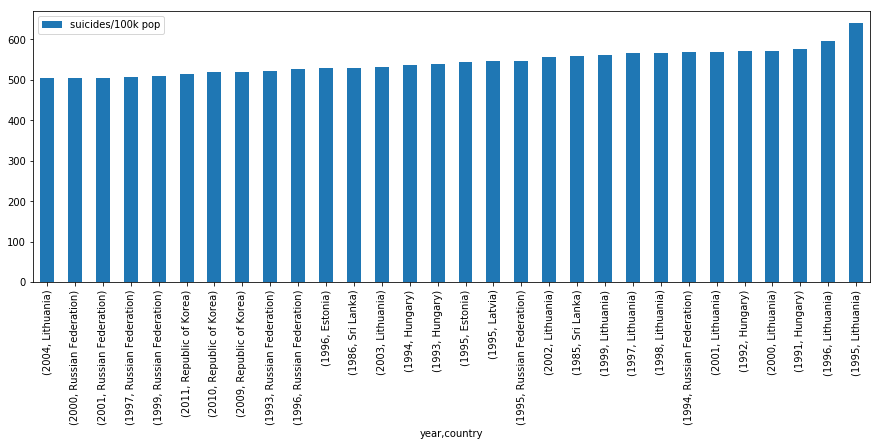

In [79]:
mast.groupby(['year','country']).agg({'suicides/100k pop':'sum'}).sort_values(by='suicides/100k pop').tail(30).plot.bar(figsize=(15,5))

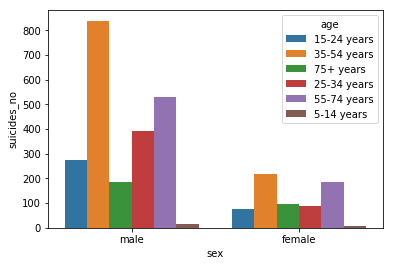

In [104]:
sns.barplot(data=mast,x='sex',y='suicides_no',hue='age',ci=0)

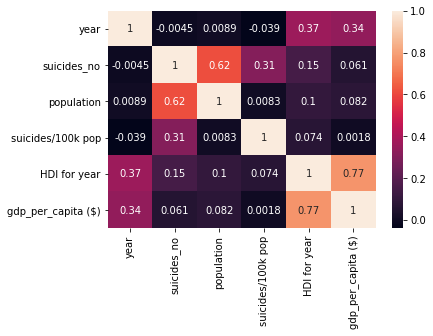

In [81]:
sns.heatmap(mast.corr(),annot=True)

In [82]:
#when we are asked to assume a target, then Target is the dependant variable(y) and the x's are the independant variables.